In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
batch_size = 512
learning_rate = 1e-3
epoch = 10000

In [3]:

x = tf.placeholder(tf.float32, shape=[None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])
z_in = tf.placeholder(tf.float32, shape=[batch_size, 100])
initializer = tf.truncated_normal_initializer(stddev=0.02)

In [4]:
def lrelu(x, leak=0.2, name="lrelu"):
    with tf.variable_scope(name):
        f1 = 0.5 * (1 + leak)
        f2 = 0.5 * (1 - leak)
        return f1 * x + f2 * abs(x)

In [5]:

def generator(z):
    
    with tf.variable_scope("generator"):
       
        fc1 = tf.contrib.layers.fully_connected(inputs=z, num_outputs=7*7*128, 
                                                activation_fn=tf.nn.relu, 
                                                normalizer_fn=tf.contrib.layers.batch_norm,
                                                weights_initializer=initializer,
                                                scope="g_fc1")
        fc1 = tf.reshape(fc1, shape=[batch_size, 7, 7, 128])
        
        conv1 = tf.contrib.layers.conv2d(fc1, num_outputs=4*64, kernel_size=5, 
                                         stride=1, padding="SAME",activation_fn=tf.nn.relu,
                                         normalizer_fn=tf.contrib.layers.batch_norm, 
                                         weights_initializer=initializer,scope="g_conv1")
        conv1 = tf.reshape(conv1, shape=[batch_size,14,14,64])
        
        conv2 = tf.contrib.layers.conv2d(conv1, num_outputs=4*32, kernel_size=5,
                                         stride=1, padding="SAME", activation_fn=tf.nn.relu,
                                         normalizer_fn=tf.contrib.layers.batch_norm, 
                                         weights_initializer=initializer,
                                         scope="g_conv2")
        conv2 = tf.reshape(conv2, shape=[batch_size,28,28,32])
        
        conv3 = tf.contrib.layers.conv2d(conv2, num_outputs=1, kernel_size=5, 
                                         stride=1, padding="SAME", 
                                         activation_fn=tf.nn.tanh,
                                         scope="g_conv3")

        return conv3

In [6]:

def discriminator(tensor,reuse=False):
    
    with tf.variable_scope("discriminator"):

        conv1 = tf.contrib.layers.conv2d(inputs=tensor, num_outputs=32,
                                         kernel_size=5, stride=2, padding="SAME", 
                                        reuse=reuse, activation_fn=lrelu,
                                         weights_initializer=initializer,
                                         scope="d_conv1")
        conv2 = tf.contrib.layers.conv2d(inputs=conv1, num_outputs=64, 
                                         kernel_size=5, stride=2, padding="SAME", 
                                         reuse=reuse, activation_fn=lrelu,
                                         normalizer_fn=tf.contrib.layers.batch_norm,
                                         weights_initializer=initializer,
                                         scope="d_conv2")
        fc1 = tf.reshape(conv2, shape=[batch_size, 7*7*64])
        fc1 = tf.contrib.layers.fully_connected(inputs=fc1, num_outputs=512,reuse=reuse,
                                                activation_fn=lrelu, 
                                                normalizer_fn=tf.contrib.layers.batch_norm, 
                                                weights_initializer=initializer,
                                                scope="d_fc1")
        fc2 = tf.contrib.layers.fully_connected(inputs=fc1, num_outputs=1, reuse=reuse,
                                                activation_fn=tf.nn.sigmoid,
                                                weights_initializer=initializer,
                                                scope="d_fc2")

        return fc2

In [7]:

g_out = generator(z_in)
d_out_fake = discriminator(g_out)
d_out_real = discriminator(x_image,reuse=True)

In [8]:

disc_loss = tf.reduce_sum(tf.square(d_out_real-1) + tf.square(d_out_fake))/2
gen_loss = tf.reduce_sum(tf.square(d_out_fake-1))/2

In [9]:
gen_variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="generator") 
dis_variables = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="discriminator")

In [10]:

d_optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
g_optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)

d_grads = d_optimizer.compute_gradients(disc_loss,dis_variables) 
g_grads = g_optimizer.compute_gradients(gen_loss,gen_variables) 

update_D = d_optimizer.apply_gradients(d_grads)
update_G = g_optimizer.apply_gradients(g_grads)

i: 0 / d_loss: 0.2531396746635437 / g_loss: 0.11469514667987823
i: 100 / d_loss: 0.21252137422561646 / g_loss: 0.14971141517162323
i: 200 / d_loss: 0.10476487874984741 / g_loss: 0.1850975751876831
i: 300 / d_loss: 0.09072503447532654 / g_loss: 0.30560073256492615
i: 400 / d_loss: 0.022847654297947884 / g_loss: 0.33966508507728577
i: 500 / d_loss: 0.0804363340139389 / g_loss: 0.27204078435897827
i: 600 / d_loss: 0.04552073776721954 / g_loss: 0.33123570680618286
i: 700 / d_loss: 0.005089149810373783 / g_loss: 0.4157331883907318
i: 800 / d_loss: 0.00391759816557169 / g_loss: 0.4468916654586792
i: 900 / d_loss: 0.0025817896239459515 / g_loss: 0.44822782278060913
i: 1000 / d_loss: 0.01757688820362091 / g_loss: 0.4707685112953186
i: 1100 / d_loss: 0.011337410658597946 / g_loss: 0.4668439030647278
i: 1200 / d_loss: 0.0009754904895089567 / g_loss: 0.4815962314605713
i: 1300 / d_loss: 0.0007122312672436237 / g_loss: 0.468177855014801
i: 1400 / d_loss: 0.0005963877774775028 / g_loss: 0.484752058

KeyboardInterrupt: 

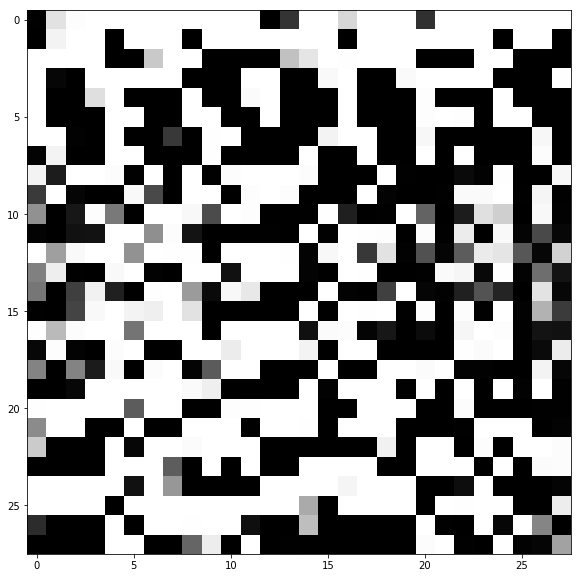

In [11]:

init = tf.global_variables_initializer()
plt.figure(figsize=(10, 10))

with tf.Session() as sess:
    sess.run(init)

    for i in range(epoch):
        batch = mnist.train.next_batch(batch_size)
        z_input = np.random.uniform(0,1.0,size=[batch_size,100]).astype(np.float32)

        _, d_loss = sess.run([update_D,disc_loss],feed_dict={x: batch[0], z_in: z_input})
        
        for j in range(4):
            _, g_loss = sess.run([update_G,gen_loss],feed_dict={z_in: z_input})

#         print("i: {} / d_loss: {} / g_loss: {}".format(i,np.sum(d_loss)/batch_size, np.sum(g_loss)/batch_size))

        if i % 100 == 0:
            print("i: {} / d_loss: {} / g_loss: {}".format(i,np.sum(d_loss)/batch_size, np.sum(g_loss)/batch_size))

            gen_o = sess.run(g_out,feed_dict={z_in: z_input})
            result = plt.imshow(gen_o[0][:, :, 0], cmap="gray")
#             plt.show()
            plt.savefig("./image/{}.png".format(i))